Our Problem at hand is to identify customers that are most likely to continue using our services and the ones that are highly unlikely
We will use the below flow to solve this problem:
a. Data Description
b. Read the data
c. Inspect the data
d. Data Manipulation

Imputing the missing values
e. Exploratory Data Analysis(EDA)
Univariate Analysis
Bi-Variate Analysis

Identify Corelations

#### Importing required Libraries

In [64]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick # For specifying the axes tick format
import missingno
import matplotlib.patches as patches
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score, recall_score
from yellowbrick.classifier import DiscriminationThreshold
import plotly.offline as py#visualization py.init_notebook_mode(connected=True)#visualization
import plotly as ply
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#### Read data from CSV

In [138]:
churn_data = pd.read_csv(r'C:\Users\vvemula\OneDrive - Investa Office Management Pty Ltd\Desktop\Data Science Code\churn_data.csv',index_col='user')

#### Inspect the data

In [139]:
pd.set_option('display.max_columns',35)
churn_data.head(10)

,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0
3120,1,32.0,R,567.0,5,3,111,5,0,227,0,0,17,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Taurus,0,0,55.0,1.83,0
41406,0,21.0,na,475.0,0,0,4,0,0,0,0,0,0,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Cancer,0,0,2.0,0.07,0
67679,0,24.0,na,NaN,0,0,2,0,0,0,0,0,0,1,0,0,0,1,0,na,0,0,0,0,Leo,0,0,1.0,0.11,0
21269,0,28.0,R,548.0,0,0,0,0,2,47,1,0,9,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Sagittarius,0,0,26.0,0.87,1


In [140]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 55409 to 52752
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   churn                    27000 non-null  int64  
 1   age                      26996 non-null  float64
 2   housing                  27000 non-null  object 
 3   credit_score             18969 non-null  float64
 4   deposits                 27000 non-null  int64  
 5   withdrawal               27000 non-null  int64  
 6   purchases_partners       27000 non-null  int64  
 7   purchases                27000 non-null  int64  
 8   cc_taken                 27000 non-null  int64  
 9   cc_recommended           27000 non-null  int64  
 10  cc_disliked              27000 non-null  int64  
 11  cc_liked                 27000 non-null  int64  
 12  cc_application_begin     27000 non-null  int64  
 13  app_downloaded           27000 non-null  int64  
 14  web_user          

From the above information we can infer that data types of int, float and object are used. There are also null values present in the dataset.

In [141]:
# understand data more by using describe method
churn_data.describe()

,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


The 'age' column ,'credit_score' column and 'rewards_earned' column state that they have null values in it


In [142]:
# describe count of categorical features
churn_data.describe(include=object)

,housing,payment_type,zodiac_sign
count,27000,27000,27000
unique,3,5,13
top,na,Bi-Weekly,Cancer
freq,13860,12716,2424


Though the info statement showed there is presence of nulls, we couldn't understand if there are any unexpected values that don't make sense. That's where the above describe statement made sense because the most common values in Housing feature is "na

In [143]:
# check the columns individually
churn_data['housing'].value_counts()

na    13860
R     10969
O      2171
Name: housing, dtype: int64

In [144]:
churn_data['payment_type'].value_counts()

Bi-Weekly       12716
Weekly           5289
na               3899
Monthly          2656
Semi-Monthly     2440
Name: payment_type, dtype: int64

In [145]:
churn_data['zodiac_sign'].value_counts()

Cancer         2424
Virgo          2410
Leo            2374
Taurus         2236
Gemini         2168
na             2159
Libra          2128
Pisces         2127
Scorpio        2118
Aquarius       2117
Sagittarius    2056
Aries          2001
Capricorn       682
Name: zodiac_sign, dtype: int64

You must have noticed there are null values in above columns in the form of 'na'. convert it in the standardized format.

In [146]:
obj_cols = ['housing','payment_type','zodiac_sign']
churn_data[obj_cols] = churn_data[obj_cols].replace('na',np.nan,regex=True)

Data Manipulation

churn                          0
age                            4
housing                    13860
credit_score                8031
deposits                       0
withdrawal                     0
purchases_partners             0
purchases                      0
cc_taken                       0
cc_recommended                 0
cc_disliked                    0
cc_liked                       0
cc_application_begin           0
app_downloaded                 0
web_user                       0
app_web_user                   0
ios_user                       0
android_user                   0
registered_phones              0
payment_type                3899
waiting_4_loan                 0
cancelled_loan                 0
received_loan                  0
rejected_loan                  0
zodiac_sign                 2159
left_for_two_month_plus        0
left_for_one_month             0
rewards_earned              3227
reward_rate                    0
is_referred                    0
dtype: int

<AxesSubplot:>

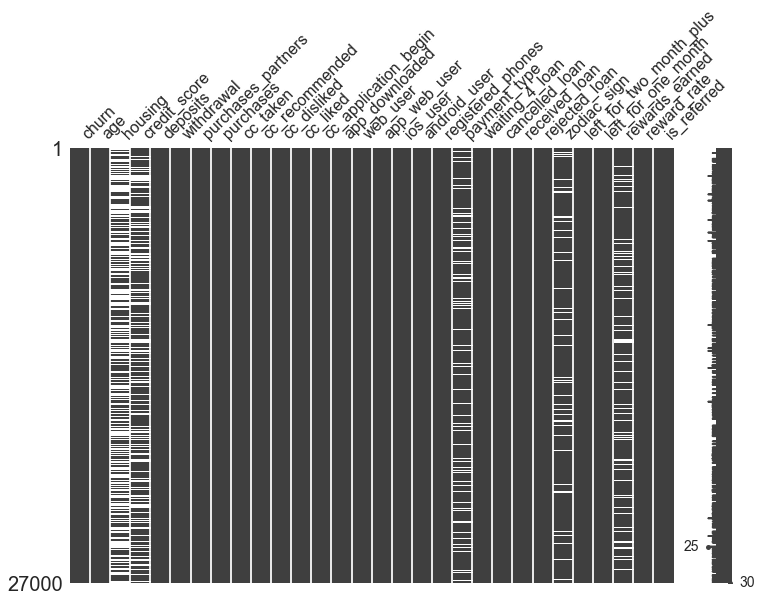

In [147]:
print(churn_data.isna().sum())
missingno.matrix(churn_data,figsize=(12,8))


White spaces in column represents a null. This is one of the most intuitive ways to understand common indices for nulls in multiple columns

Imputing the missing values

For numerical cols impute mean

In [148]:
num_cols = ['age','credit_score','rewards_earned']

churn_data[num_cols] = churn_data[num_cols].fillna(churn_data[num_cols].mean())

In [149]:
 #Converting this null values using 'mode'
churn_data[obj_cols] = churn_data[obj_cols].fillna(churn_data[obj_cols].mode().iloc[0])

For Categorical cols impute mode

In [150]:
# Checking for null values after imputation
churn_data.isnull().sum()

churn                      0
age                        0
housing                    0
credit_score               0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
rewards_earned             0
reward_rate                0
is_referred                0
dtype: int64

In [151]:
# Getting unique column of each feature
churn_data.nunique()

churn                        2
age                         74
housing                      2
credit_score               460
deposits                    66
withdrawal                  23
purchases_partners         294
purchases                   64
cc_taken                    12
cc_recommended             325
cc_disliked                 20
cc_liked                     9
cc_application_begin       128
app_downloaded               2
web_user                     2
app_web_user                 2
ios_user                     2
android_user                 2
registered_phones            5
payment_type                 4
waiting_4_loan               2
cancelled_loan               2
received_loan                2
rejected_loan                2
zodiac_sign                 12
left_for_two_month_plus      2
left_for_one_month           2
rewards_earned              92
reward_rate                193
is_referred                  2
dtype: int64

"zodiac_sign" - It is intuitive to say it doesn't have impact on churn because it is highly unlikely only people from Gemini and Scorpio churn but others never. So we can drop it for further analysis

In [152]:
churn_data = churn_data.drop(['zodiac_sign'],axis=1)

Outlier Analysis

In [154]:
cont_var = ['age','credit_score','deposits','withdrawal','purchases_partners','purchases','cc_disliked',
            'cc_liked','cc_application_begin','rewards_earned','reward_rate']

<AxesSubplot:>

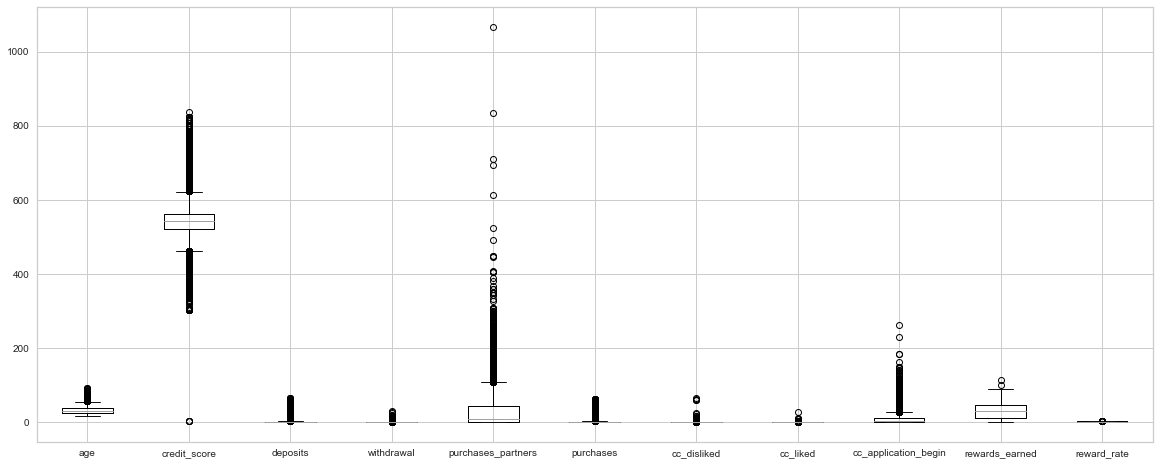

In [155]:
churn_data[cont_var].boxplot(return_type='axes',figsize=(20,8))

In [205]:
for i in cont_var:
    q75, q25 = np.percentile(churn_data.loc[:,i], [75, 25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
    print('Column Name : ', i)
    print("Min value : ",minn)
    print("Max value : ",maxx)
    print(" ")
    print('# outliers in {var}  ---->{X} Outliers'.format(var=i, X = (churn_data.loc[churn_data.loc[:,i]
                                  < minn, i].count() + churn_data.loc[churn_data.loc[:,i] >
                                                                         maxx, i].count())))

Column Name :  age
Min value :  7.0
Max value :  55.0
 
# outliers in age  ---->838 Outliers
Column Name :  credit_score
Min value :  462.0
Max value :  622.0
 
# outliers in credit_score  ---->3203 Outliers
Column Name :  deposits
Min value :  -1.5
Max value :  2.5
 
# outliers in deposits  ---->5298 Outliers
Column Name :  withdrawal
Min value :  0.0
Max value :  0.0
 
# outliers in withdrawal  ---->4005 Outliers
Column Name :  purchases_partners
Min value :  -64.5
Max value :  107.5
 
# outliers in purchases_partners  ---->1391 Outliers
Column Name :  purchases
Min value :  -1.5
Max value :  2.5
 
# outliers in purchases  ---->5258 Outliers
Column Name :  cc_disliked
Min value :  0.0
Max value :  0.0
 
# outliers in cc_disliked  ---->556 Outliers
Column Name :  cc_liked
Min value :  0.0
Max value :  0.0
 
# outliers in cc_liked  ---->230 Outliers
Column Name :  cc_application_begin
Min value :  -16.5
Max value :  27.5
 
# outliers in cc_application_begin  ---->1713 Outliers
Column N

If outliers are removed , 60.82% of data will be lost. So, it doesn't seem to be an effective way to use outliers.

Exploratory Data Analysis(EDA)

 EDA by finding out the proportion of customers being churned or retained by the bank.

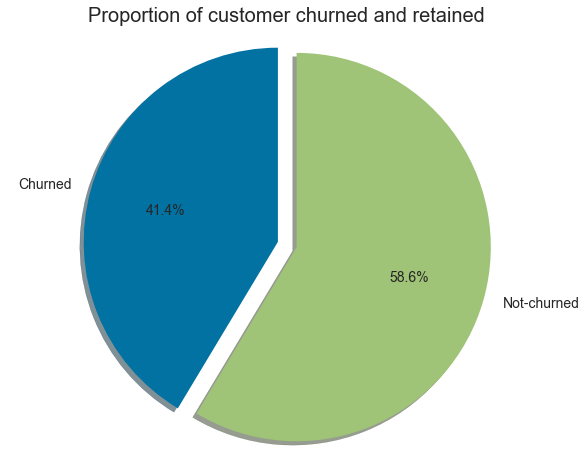

In [156]:
labels = 'Churned','Not-churned'
sizes = [churn_data.churn[churn_data['churn']==1].count(), churn_data.churn[churn_data['churn']==0].count()]
explode = (0, 0.1)
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize':14})
ax.axis('equal')
plt.title("Proportion of customer churned and retained",size=20)
plt.show()

About 41.4% of customers are getting churned. We have to ensure that the model which we choose predicts this 41.4% with greater accuracy as the bank has to work on it and retain it's customers who are on the verge of churning.
On the similar lines let's replace the 'churn' column labels to 'churn' and 'No_churn' for analysis

In [157]:
churned_users = {0:'No_churn', 1: 'churn'}

In [158]:
churn_data['churn'] = [churned_users[i] for i in churn_data.churn]

In [159]:
churn_data.head()

,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55409,No_churn,37.0,R,542.944225,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,1,0,29.110125,0.00,0
23547,No_churn,28.0,R,486.000000,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,0,0,44.000000,1.47,1
58313,No_churn,35.0,R,561.000000,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,1,0,65.000000,2.17,0
8095,No_churn,26.0,R,567.000000,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,0,0,33.000000,1.10,1
61353,churn,27.0,R,542.944225,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,1,0,1.000000,0.03,0


#Column 'cc_taken'
'cc_taken' indicates the Credit_Cards taken by the customers from the bank 

In [160]:
churn_data['cc_taken'].value_counts()

0     25705
1       923
2       218
3        75
4        45
5        16
6        11
10        2
7         2
29        1
11        1
8         1
Name: cc_taken, dtype: int64

Many customers have not opted for Credit_Cards, but there are customers who have opted for Credit Cards many times. Inorder, to make the understanding better let us categorize it based on frequencies.

In [161]:
# Convert the values in column 'cc_taken' to various categories 
cc_taken_freq=1000
cc=dict(zip(*np.unique(churn_data.cc_taken,return_counts=True)))
churn_data.cc_taken=churn_data.cc_taken.apply(lambda x:'Opted' if cc[x] < cc_taken_freq else 'Not-opted')

In [162]:
churn_data['cc_taken'].value_counts()

Not-opted    25705
Opted         1295
Name: cc_taken, dtype: int64

Column 'cc_recommended'
Credit cards being referred by customers

In [163]:
churn_data['cc_recommended'].value_counts()[:20]

0     3767
5      757
1      440
10     401
6      338
15     318
4      276
20     243
2      232
11     228
3      211
30     200
25     189
9      184
35     178
12     171
8      169
16     162
7      158
40     155
Name: cc_recommended, dtype: int64

In [164]:
cc_recomm_freq=3000
cc_recomm=dict(zip(*np.unique(churn_data.cc_recommended,return_counts=True))) 
churn_data.cc_recommended=churn_data.cc_recommended.apply(lambda x:'Recommended' if cc_recomm[x] < cc_recomm_freq else 'Not-recommended')

In [165]:
churn_data['cc_recommended'].value_counts()

Recommended        23233
Not-recommended     3767
Name: cc_recommended, dtype: int64

Column 'registered_phones'¶

In [166]:
churn_data['registered_phones'].value_counts()

0    21960
2     4048
3      754
4      183
5       55
Name: registered_phones, dtype: int64

In [167]:
reg_phone_freq=5000
reg_phone = dict(zip(*np.unique(churn_data.registered_phones,return_counts=True)))
churn_data.registered_phones=churn_data.registered_phones.apply(lambda x:'Not-Registered' if reg_phone[x] < reg_phone_freq else 'Registered')

Let us categorise the above variable into two different categories:- 'Registered' and 'Not-Registered

In [168]:
churn_data['registered_phones'].value_counts()

Registered        21960
Not-Registered     5040
Name: registered_phones, dtype: int64

This categorization doesn't directly impact performance of predictive power instead it will help us realize how changes in other features affect this one. This is a very common procedure in EDA.

In [169]:
# Converting the features to 'object' data type
cat_cols = ['housing','cc_taken','cc_recommended','app_downloaded','web_user','app_web_user','ios_user','android_user','registered_phones','payment_type','waiting_4_loan','cancelled_loan','received_loan','rejected_loan','left_for_two_month_plus','left_for_one_month','is_referred']
churn_data[cat_cols] = churn_data[cat_cols].astype('object')

In [170]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 55409 to 52752
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   churn                    27000 non-null  object 
 1   age                      27000 non-null  float64
 2   housing                  27000 non-null  object 
 3   credit_score             27000 non-null  float64
 4   deposits                 27000 non-null  int64  
 5   withdrawal               27000 non-null  int64  
 6   purchases_partners       27000 non-null  int64  
 7   purchases                27000 non-null  int64  
 8   cc_taken                 27000 non-null  object 
 9   cc_recommended           27000 non-null  object 
 10  cc_disliked              27000 non-null  int64  
 11  cc_liked                 27000 non-null  int64  
 12  cc_application_begin     27000 non-null  int64  
 13  app_downloaded           27000 non-null  object 
 14  web_user          

In [206]:
churn_data.head()

,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55409,No_churn,37.0,R,542.944225,0,0,0,0,Not-opted,Not-recommended,0,0,0,1,1,1,1,0,Registered,Bi-Weekly,0,0,0,0,1,0,29.110125,0.00,0
23547,No_churn,28.0,R,486.000000,0,0,1,0,Not-opted,Recommended,0,0,5,1,1,1,1,0,Registered,Weekly,0,0,0,0,0,0,44.000000,1.47,1
58313,No_churn,35.0,R,561.000000,47,2,86,47,Not-opted,Recommended,0,0,9,1,0,0,0,1,Not-Registered,Semi-Monthly,0,0,0,0,1,0,65.000000,2.17,0
8095,No_churn,26.0,R,567.000000,26,3,38,25,Not-opted,Recommended,0,0,26,1,0,0,0,1,Registered,Bi-Weekly,0,0,0,0,0,0,33.000000,1.10,1
61353,churn,27.0,R,542.944225,0,0,2,0,Not-opted,Not-recommended,0,0,0,1,1,1,0,1,Registered,Bi-Weekly,0,0,0,0,1,0,1.000000,0.03,0


## Univariate Analysis

In [171]:
def visualize_plot(df, col_to_exclude, tgt_col, object_mode = True):
    n = 0
    this = []
    
    if object_mode:
        n_rows = 4
        n_cols = 4
        width = 20
        height = 20
    else:
        n_rows = 5
        n_cols = 2
        width = 20
        height = 20
        
    for column in df.columns:
        if object_mode:
            if (df[column].dtypes == 'O') & (column != col_to_exclude):
                this.append(column)
        
        else:
            if (df[column].dtypes != 'O')& (column != tgt_col):
                this.append(column)
                
    
    fig, ax = plt.subplots(n_rows, n_cols, sharex=False, sharey=False, figsize=(width,height))
    for row in range(n_rows):
        for col in range(n_cols):
            if object_mode:
                g = sns.countplot(df[this[n]], ax=ax[row][col])
        
            else:
                g = sns.distplot(df[this[n]], ax=ax[row][col])
        
                
                
            ax[row,col].set_title("Column Name: {}".format(this[n]))
            ax[row,col].set_xlabel("")
            ax[row,col].set_ylabel("")
            n += 1
    
    
    plt.show();
    return 

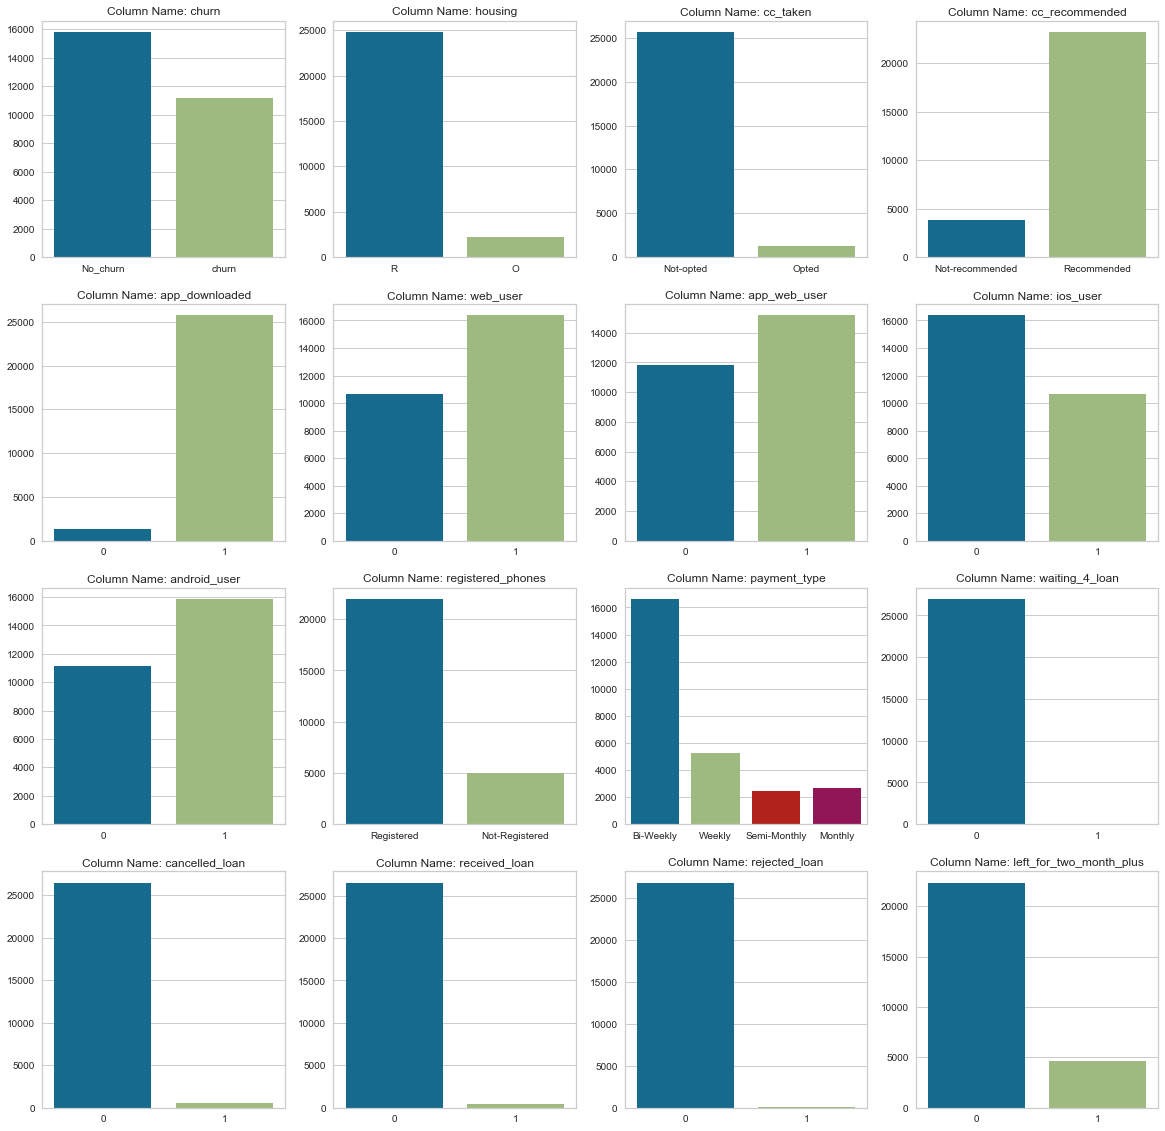

In [172]:
visualize_plot(churn_data,'user','churn',object_mode=True)

Most of the customers of the bank reside in rent houses and the credit cards opted by them are quite less. Well, the credit cards are recommended to them regularly by the bank. Looks like they are prominent users of  online bank portals rather than physically  visiting bank, we can see through their usage of mobile apps, web apps and less use of landline phones. They prefer to pay credit card bills every fortnight. Even though loans are being granted to them without much hiccups, but still some customers aren't happy with the bank and they seem to be inactive for a longer tenure.

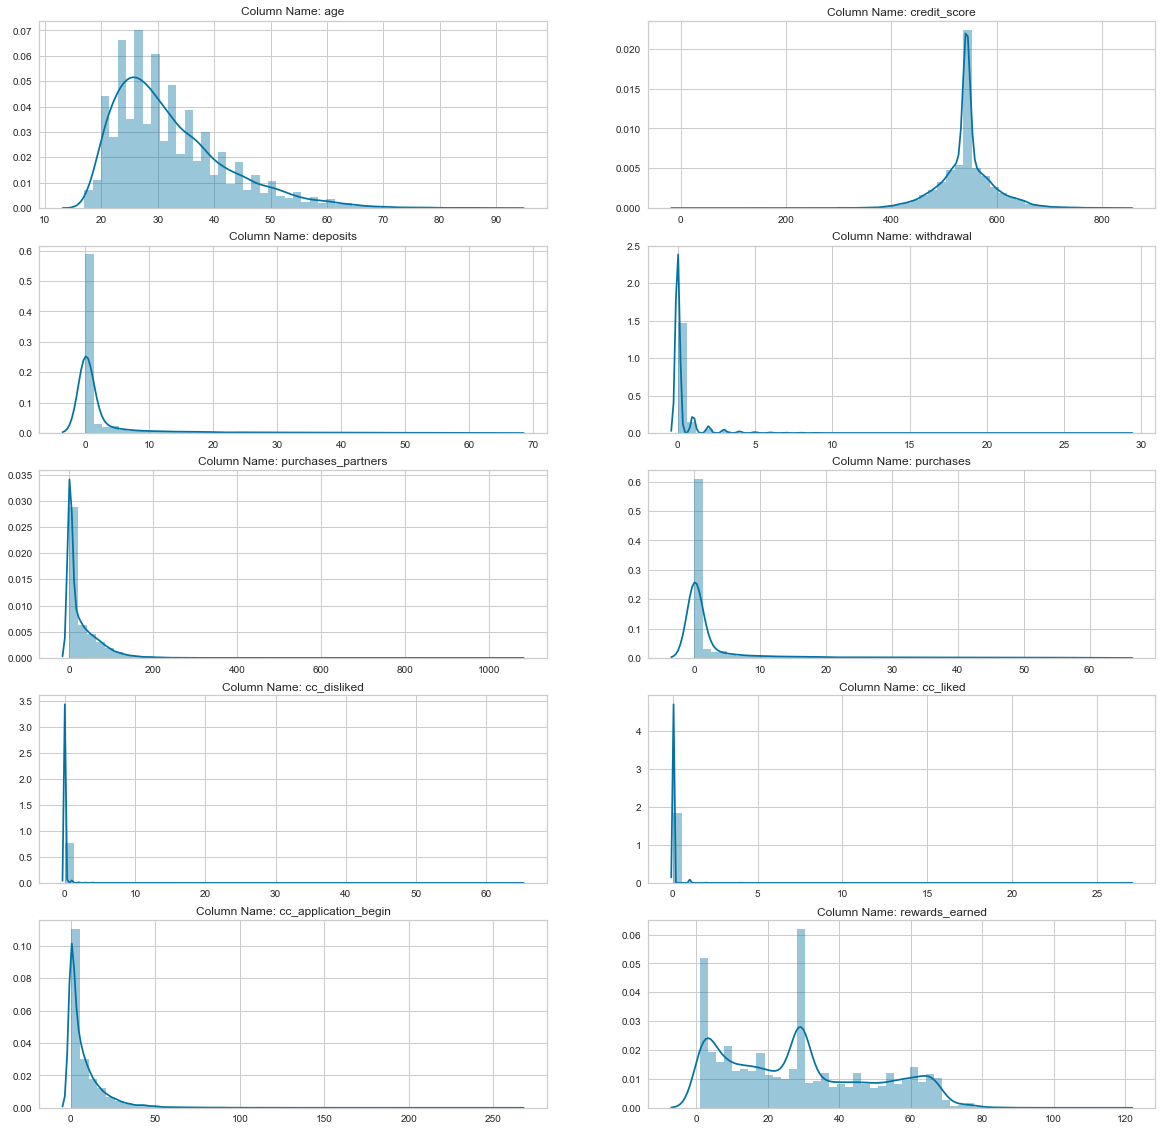

In [173]:
visualize_plot(churn_data,'user','churn',object_mode=False)

In [174]:
churn_data['deposits'].value_counts()

0     18156
1      2461
2      1085
3       679
4       454
      ...  
62        7
61        4
64        2
63        2
65        1
Name: deposits, Length: 66, dtype: int64

When it comes to continuous variables, features seem to be mostly skewed towards right . It means the features have mean greater than the median.

Bi-Variate Analysis

In [175]:
def bi_variate(df, col1, col2):
    
    if col2 == 'churn':
        cross_name = pd.crosstab(df[col1], df[col2]).apply(lambda x: x/x.sum() * 100, axis=1)
    else:
        cross_name = pd.crosstab(df[col1], df[col2]).apply(lambda x: x/x.sum() * 100, axis=0)
   # print(cross_name)
    cross_name.plot.bar()
    plt.xlabel('{}'.format(col1))
    plt.ylabel('% of churn rate')
    plt.title('{} Vs churn'.format(col1))
    plt.xticks(rotation=0)
    plt.figure(figsize=(16,12))
    plt.show()
    return cross_name


Housing Vs churn

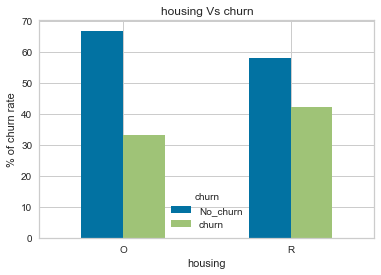

<Figure size 1152x864 with 0 Axes>

churn,No_churn,churn
housing,,
O,66.743436,33.256564
R,57.904064,42.095936


In [176]:
bi_variate(churn_data, 'housing', 'churn')

On observation of graph, we can infer that Rental housing customer have higher churn rate . Since, rental customers would need a loan to buy own house. If they are satisfied with another bank they might get switched. Also, rental customers have more probability of shifting locations, so they might prefer banks which is near to their location. That also might be the reason for churn of rental customers.

cc_taken Vs churn

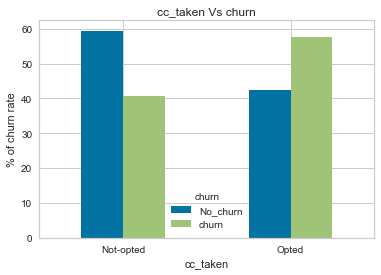

<Figure size 1152x864 with 0 Axes>

churn,No_churn,churn
cc_taken,,
Not-opted,59.435907,40.564093
Opted,42.316602,57.683398


In [177]:
bi_variate(churn_data, 'cc_taken', 'churn')

From analysis we come to know that 57.68% of customers are getting churned who have for credit card. The customers might not be able to repay their credit loans or interest rates might have rised up, also their might be possibility of customers becoming unemployed without any prior knowledge or better credit card from other bank might lead to change in bank account as well. 

cc_recommended Vs churn

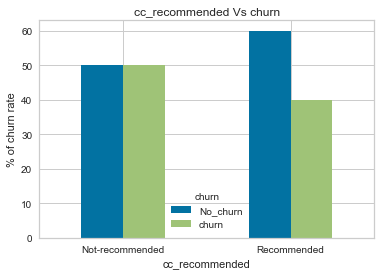

<Figure size 1152x864 with 0 Axes>

churn,No_churn,churn
cc_recommended,,
Not-recommended,49.986727,50.013273
Recommended,60.013774,39.986226


In [178]:
bi_variate(churn_data, 'cc_recommended','churn')

We see that customers getting recommended for credit cards and getting churned is about 40%. So , bank needs to work on various strategies while referring credit cards to customers.

payment_type Vs churn

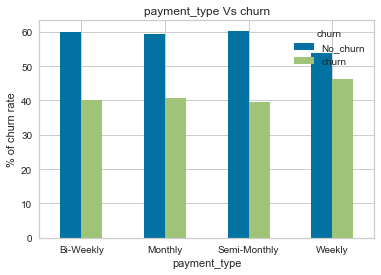

<Figure size 1152x864 with 0 Axes>

churn,No_churn,churn
payment_type,,
Bi-Weekly,59.795366,40.204634
Monthly,59.224398,40.775602
Semi-Monthly,60.327869,39.672131
Weekly,53.809794,46.190206


In [179]:
bi_variate(churn_data, 'payment_type','churn')
# round to 2 digits

From the above graphs we infer that, customers who are paying their credit cards Bi-Weekly and Weekly are the most. Also, they are the ones who are getting churned the highest. It might be due to the offers or interest rate they may find in other banks.

cancelled_loan Vs churn

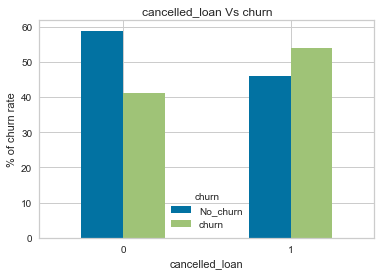

<Figure size 1152x864 with 0 Axes>

churn,No_churn,churn
cancelled_loan,,
0,58.855504,41.144496
1,46.062992,53.937008


In [180]:
bi_variate(churn_data,'cancelled_loan','churn')

 customers loan getting cancelled are the most getting churned.

received_loan Vs churn

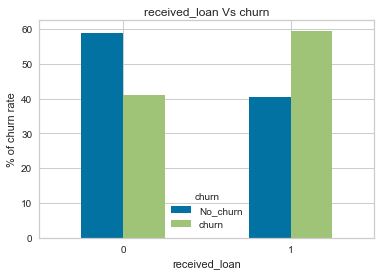

<Figure size 1152x864 with 0 Axes>

churn,No_churn,churn
received_loan,,
0,58.949791,41.050209
1,40.529532,59.470468


In [181]:
bi_variate(churn_data, 'received_loan','churn')

Customers who are receiving loans are getting churned. It might be due to repayment of loans, high-interest rates charged by banks.

rejected_loan Vs churn

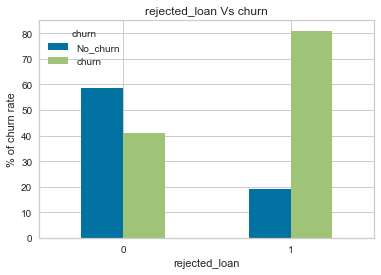

<Figure size 1152x864 with 0 Axes>

churn,No_churn,churn
rejected_loan,,
0,58.809736,41.190264
1,18.939394,81.060606


In [182]:
bi_variate(churn_data, 'rejected_loan','churn')

Above observation shows us that, rejection of loan in customers has maximum churn rate. Out of coursity , let us see how it would be for waiting_4_loan customers.

waiting_4_loan vs churn

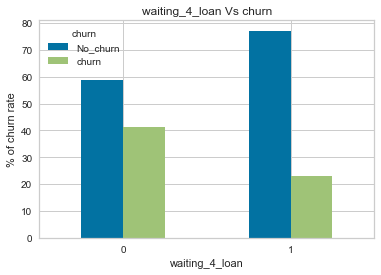

<Figure size 1152x864 with 0 Axes>

churn,No_churn,churn
waiting_4_loan,,
0,58.590766,41.409234
1,77.142857,22.857143


In [183]:
bi_variate(churn_data,'waiting_4_loan','churn')

Customers waiting_4_loan and churning is fine. But, customers not waiting_4_loan and getting churned is an alarming situation. Bank need to analyse this scenario.

 customer churn (mobile/web) applications

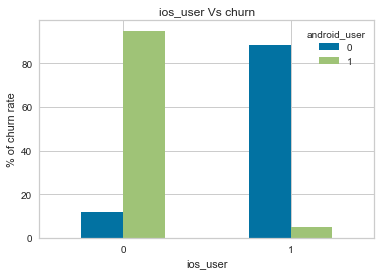

<Figure size 1152x864 with 0 Axes>

android_user,0,1
ios_user,,
0,11.647523,95.017659
1,88.352477,4.982341


In [184]:
bi_variate(churn_data,'ios_user','android_user')

Usage of Android phones is more compare to ios phones by customers. Bank can comeup with new mobile-friendly usage of applications to these users.

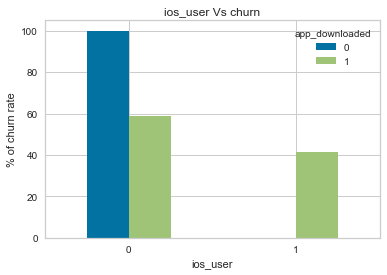

<Figure size 1152x864 with 0 Axes>

app_downloaded,0,1
ios_user,,
0,100.0,58.642143
1,0.0,41.357857


In [185]:
# How many have downloaded apps among ios and android phones
# Let us first find for ios_users
bi_variate(churn_data,'ios_user','app_downloaded')

So we can say that android users have mostly downloaded the bank's apps in their mobiles. Android allows easy accessible to apps with no much restriction, that is why android users are far better in using apps than ios_users.

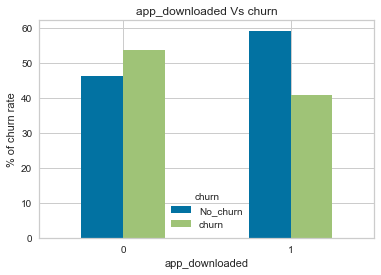

<Figure size 1152x864 with 0 Axes>

churn,No_churn,churn
app_downloaded,,
0,46.375682,53.624318
1,59.225415,40.774585


In [186]:
# let us compare the app's downloaded to the churn of customer from bank
bi_variate(churn_data, 'app_downloaded','churn')

Customers who are not using the bank apps are getting churned the most, since they may be not using the features, much help to them may not be reached instantly so finding hindrance in reaching out to banks. Also, it can be acute information about the latest bank updates and policies to them , which will be easily notified through bank apps.

customer churn in case of app_web_user

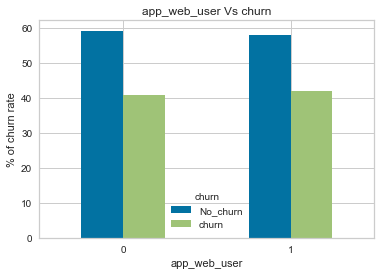

<Figure size 1152x864 with 0 Axes>

churn,No_churn,churn
app_web_user,,
0,59.241105,40.758895
1,58.126195,41.873805


In [187]:
# Comparison of app_web_user Vs churn
bi_variate(churn_data,'app_web_user','churn')

There is slight difference in churn rate, among customers using app_web and not using app_web.

web_user Vs churn

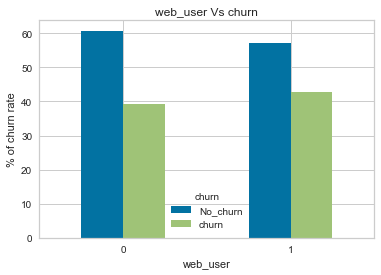

<Figure size 1152x864 with 0 Axes>

churn,No_churn,churn
web_user,,
0,60.765325,39.234675
1,57.217062,42.782938


In [188]:
bi_variate(churn_data,'web_user','churn')

There is not much variation among web_users and non-web_users getting churned

left_for_two_month_plus Vs left_for_one_month

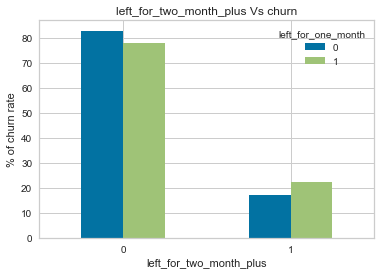

<Figure size 1152x864 with 0 Axes>

left_for_one_month,0,1
left_for_two_month_plus,,
0,82.747435,77.663934
1,17.252565,22.336066


In [189]:
bi_variate(churn_data, 'left_for_two_month_plus','left_for_one_month')

We can observe that 77% customers have left for one month. Let us see how is it impacting the churn.

left_for_one_month Vs churn

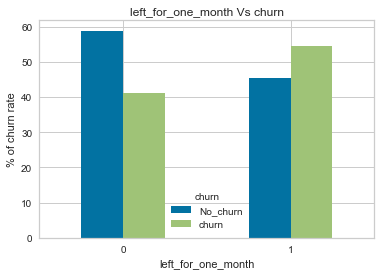

<Figure size 1152x864 with 0 Axes>

churn,No_churn,churn
left_for_one_month,,
0,58.856367,41.143633
1,45.491803,54.508197


In [190]:
bi_variate(churn_data ,'left_for_one_month','churn')

Customers who have left_for_one_month and are getting churned because they are not satisfied with the services they are expecting from the bank. They may be satisfied with the schemes offered by other banks .

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'credit_score'),
  Text(2.5, 0, 'deposits'),
  Text(3.5, 0, 'withdrawal'),
  Text(4.5, 0, 'purchases_partners'),
  Text(5.5, 0, 'purchases'),
  Text(6.5, 0, 'cc_disliked'),
  Text(7.5, 0, 'cc_liked'),
  Text(8.5, 0, 'cc_application_begin'),
  Text(9.5, 0, 'rewards_earned'),
  Text(10.5, 0, 'reward_rate')])

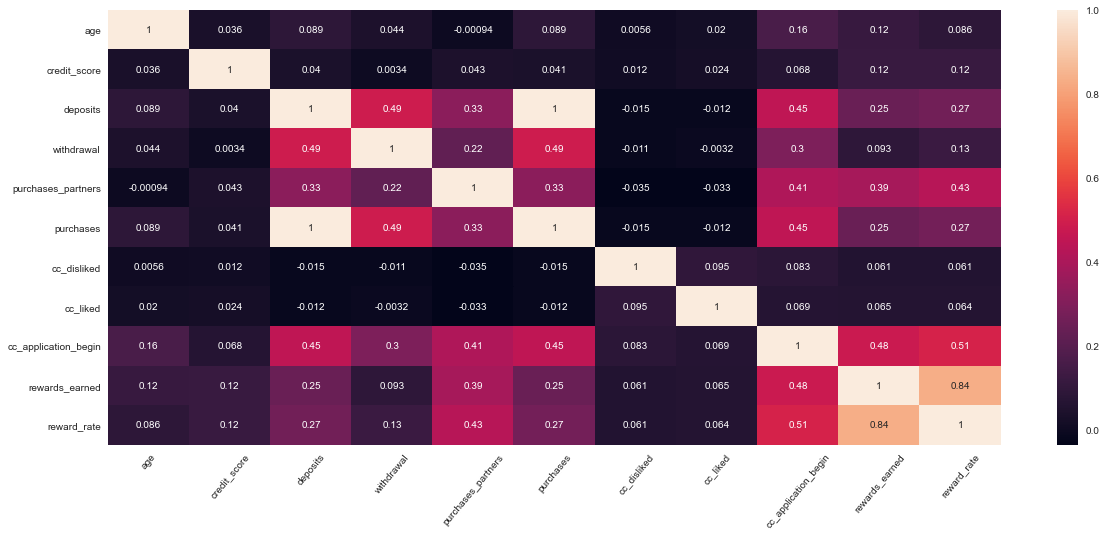

In [191]:
# correlation matrix in seaborn

plt.figure(figsize=(20,8))
sns.heatmap(churn_data.corr(),xticklabels=churn_data.corr().columns.values,
yticklabels=churn_data.corr().columns.values, annot=True);
plt.xticks(rotation=50)

'Purchases' and 'Deposits' are highly correlated to each other. Also, there is a strong correlation between 'rewards_earned' and 'rewards_rate'. We can say that, Value of one point = rewards_rate/ rewards_earned. 

Relation of continuous variables with the target feature 'churn'

In [127]:
# Let us convert again target column 'churn' to 0's and 1's inorder to perform comparison with continuous variables

churn_str = {"No_churn" : 0, "churn" :1 }
churn_data['churn'] = churn_data['churn'].map(churn_str)

In [192]:
churn_data.head()

,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55409,No_churn,37.0,R,542.944225,0,0,0,0,Not-opted,Not-recommended,0,0,0,1,1,1,1,0,Registered,Bi-Weekly,0,0,0,0,1,0,29.110125,0.00,0
23547,No_churn,28.0,R,486.000000,0,0,1,0,Not-opted,Recommended,0,0,5,1,1,1,1,0,Registered,Weekly,0,0,0,0,0,0,44.000000,1.47,1
58313,No_churn,35.0,R,561.000000,47,2,86,47,Not-opted,Recommended,0,0,9,1,0,0,0,1,Not-Registered,Semi-Monthly,0,0,0,0,1,0,65.000000,2.17,0
8095,No_churn,26.0,R,567.000000,26,3,38,25,Not-opted,Recommended,0,0,26,1,0,0,0,1,Registered,Bi-Weekly,0,0,0,0,0,0,33.000000,1.10,1
61353,churn,27.0,R,542.944225,0,0,2,0,Not-opted,Not-recommended,0,0,0,1,1,1,0,1,Registered,Bi-Weekly,0,0,0,0,1,0,1.000000,0.03,0


DataFrame consisting of Continuous variables for further EDA

In [130]:
churn_data_cont = churn_data.select_dtypes([np.int64, np.float64])

In [193]:
churn_data_cont.head()

,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
user,,,,,,,,,,,,,,,,,,,,,,,,,
55409,0,37.0,NaN,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,NaN,0.00,0
23547,0,28.0,486.0,0,0,1,0,0,0,5,1,1,1,1,0,0,0,0,0,0,0,0,44.0,1.47,1
58313,0,35.0,561.0,47,2,86,47,0,0,9,1,0,0,0,1,2,0,0,0,0,1,0,65.0,2.17,0
8095,0,26.0,567.0,26,3,38,25,0,0,26,1,0,0,0,1,0,0,0,0,0,0,0,33.0,1.10,1
61353,1,27.0,NaN,0,0,2,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1.0,0.03,0


Finding the distributions of continuous variables with resect to target

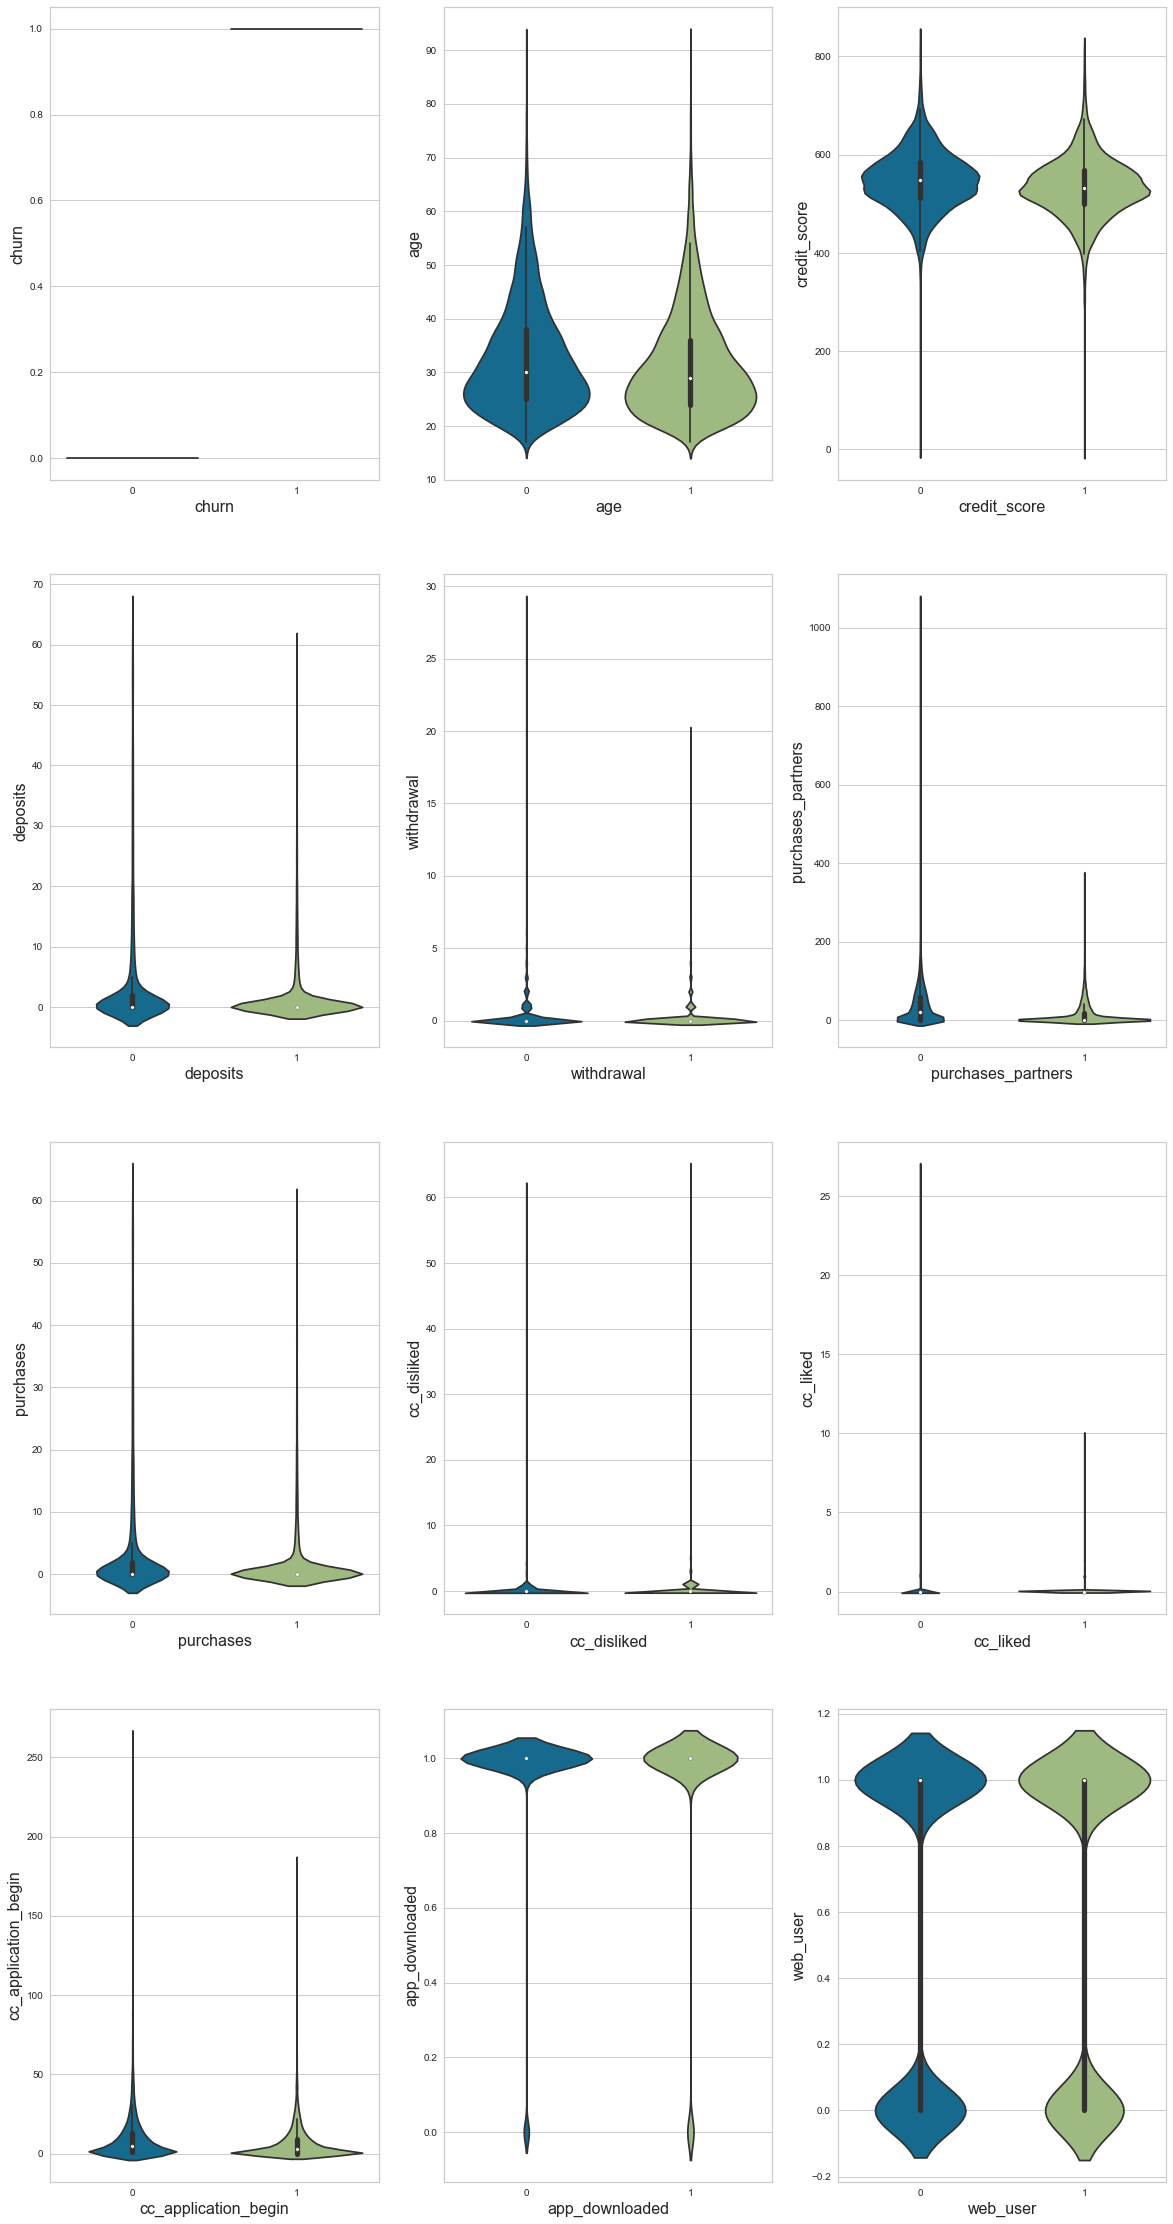

In [132]:
nrows=4
ncols=3
this = []
n = 0

for column in churn_data_cont.columns:
       this.append(column)
        
fig, ax = plt.subplots(nrows,ncols, figsize=(20,40))
for row in range(nrows):
    for col in range(ncols):
        g = sns.violinplot(y=this[n], x='churn',data=churn_data_cont,ax=ax[row][col])
        
        ax[row][col].set_xlabel(this[n],fontsize=16)
        ax[row][col].set_ylabel(this[n],fontsize=16)
        n += 1
    
        

Summary of the above observation:-
For comparing the churned and unchurned distributions in continuous variables , violin plots seem to be very insightful. Hence, we have used it for our plotting.

From figure we can see that violin plots are corresponding to two different distribution[churned and unchurned].

Interestingly, the mean of the unchurned is higher than the median , it means there are outliers which are pulling the value up in columns such as 'age', 'deposits','cc_application_begin' and so on...

While in some columns like 'withdrawal','credit_score' distributions are almost the same among churned data and unchurned data.

Correlation between Age and Credit_Score

In [194]:
np.corrcoef(churn_data.credit_score, churn_data.age)

array([[1.        , 0.03559663],
       [0.03559663, 1.        ]])

We are not able to observe much correlation between the two.

Correlation between Age and Payment_Type

<AxesSubplot:xlabel='age', ylabel='payment_type'>

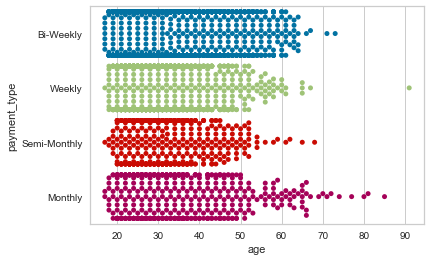

In [201]:
sns.swarmplot(x="age", y="payment_type", data=churn_data[0:5000])

Correlation between Credit_score Vs Rewards_earned

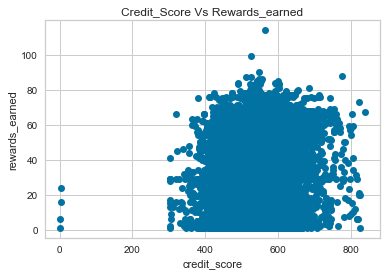

In [202]:
plt.plot('credit_score','rewards_earned', data=churn_data, linestyle='none', marker='o')
plt.xlabel('credit_score')
plt.ylabel('rewards_earned')
plt.title('Credit_Score Vs Rewards_earned')
plt.show()

Customers with low credit score are still getting rewards more than 20. This can't be the case, it might be wrong data being entered here.
Customers having score in range of 500-600 are having reward points more than 100, while customers having good ranging between 700-750 have rewards_earned about 80-85.
Most of the customers have credit score ranging from 400-700 and rewards earned in the range 0-80.

Relation between deposits Vs Credit_Card recommendation

<AxesSubplot:xlabel='deposits', ylabel='cc_recommended'>

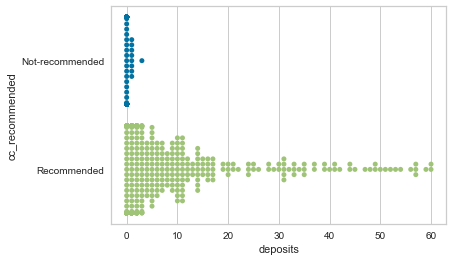

In [204]:
sns.swarmplot(x="deposits", y="cc_recommended", data=churn_data[0:1000])